In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, mean_squared_error, mean_absolute_error
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
df = pd.read_csv('/content/drive/MyDrive/datasets/BankNote_Authentication.csv')
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [3]:
X = df.iloc[:, :-1].values
Y = df['class'].values
X.shape, Y.shape

((1372, 4), (1372,))

In [4]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, stratify = Y, random_state = 100)
Xtrain.shape, Xtest.shape

((1029, 4), (343, 4))

In [5]:
Xtrain = torch.FloatTensor(Xtrain)
Xtest = torch.FloatTensor(Xtest)

Ytrain = torch.FloatTensor(Ytrain)
Ytest = torch.FloatTensor(Ytest)

print(type(Xtrain), type(Ytrain))

<class 'torch.Tensor'> <class 'torch.Tensor'>


In [6]:
Xtrain.shape, Ytrain.shape

(torch.Size([1029, 4]), torch.Size([1029]))

**Model building**

In [26]:
class ANN_model(nn.Module):
  def __init__(self, input_features= 4, h1 = 16, h2 = 16, d = 0.2, out_features = 1):
    super().__init__()
    self.hidden1 = nn.Linear(input_features, h1)
    self.act1 = nn.ReLU()
    self.hidden2 = nn.Linear(h1, h2)
    self.act2 = nn.ReLU()
    self.dropout = nn.Dropout(d)
    self.out = nn.Linear(h2, out_features)
    self.act3 = nn.Sigmoid()

  def forward(self, x):
    x = self.act1(self.hidden1(x))
    x = self.act2(self.hidden2(x))
    x = self.dropout(x)
    x = self.act3(self.out(x))
    return x



In [27]:
model = ANN_model()

In [28]:
model.parameters

<bound method Module.parameters of ANN_model(
  (hidden1): Linear(in_features=4, out_features=16, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=16, out_features=16, bias=True)
  (act2): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (out): Linear(in_features=16, out_features=1, bias=True)
  (act3): Sigmoid()
)>

In [29]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [30]:
epochs = 20
batch_size = 32

**Model training**

In [31]:
final_losses=[]

for epoch in range(0, epochs):
  for i in range(0, len(Xtrain), batch_size):
    Xbatch = Xtrain[i: i+batch_size]
    Ybatch = Ytrain[i: i+batch_size]

    Ypred = model.forward(Xbatch)
    Ypred = Ypred.ravel()

    loss = loss_fn(Ypred, Ybatch)
    final_losses.append(loss)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f"Epoch number: {epoch} and the loss : {final_losses[epoch]}")




Epoch number: 0 and the loss : 0.6960306763648987
Epoch number: 1 and the loss : 0.6483134031295776
Epoch number: 2 and the loss : 0.6759691834449768
Epoch number: 3 and the loss : 0.5883802175521851
Epoch number: 4 and the loss : 0.51972895860672
Epoch number: 5 and the loss : 0.565261721611023
Epoch number: 6 and the loss : 0.637664794921875
Epoch number: 7 and the loss : 0.5107526779174805
Epoch number: 8 and the loss : 0.5441910624504089
Epoch number: 9 and the loss : 0.510501503944397
Epoch number: 10 and the loss : 0.45359566807746887
Epoch number: 11 and the loss : 0.5220552086830139
Epoch number: 12 and the loss : 0.36537253856658936
Epoch number: 13 and the loss : 0.36542409658432007
Epoch number: 14 and the loss : 0.4976183772087097
Epoch number: 15 and the loss : 0.36001548171043396
Epoch number: 16 and the loss : 0.2709769308567047
Epoch number: 17 and the loss : 0.3785235285758972
Epoch number: 18 and the loss : 0.4216991066932678
Epoch number: 19 and the loss : 0.21562123

**Prediction**

In [32]:

with torch.no_grad():
  Yp = model(Xtest)

Yp = Yp.ravel()
Yp = torch.round(Yp)
Yp

tensor([0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1.,
        1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
        1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
        1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
        1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1.,
        1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
        0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
        0., 1., 0., 0., 0., 1., 1., 1., 

In [33]:
accuracy_score(Ytest, Yp)

1.0

In [34]:
print(classification_report(Ytest, Yp))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       191
         1.0       1.00      1.00      1.00       152

    accuracy                           1.00       343
   macro avg       1.00      1.00      1.00       343
weighted avg       1.00      1.00      1.00       343



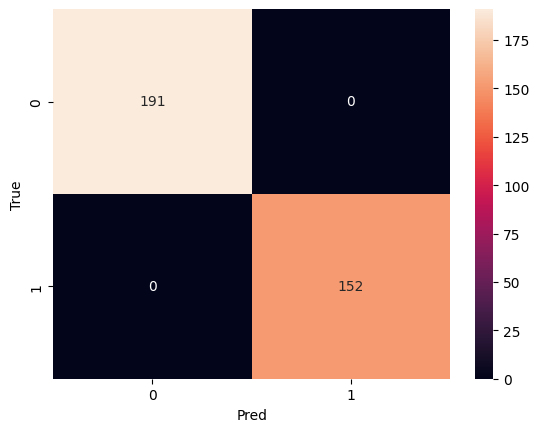

In [25]:
cm = confusion_matrix(Ytest, Yp)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Pred')
plt.ylabel('True')
plt.show()